## CNN + Deep LSTM(Bi LSTM) , Deep GRU(Bi GRU)

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 

### CNN + LSTM + LSTM

In [3]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64, input_shape = (600,6), return_sequences = True))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 94s 1s/step - loss: 3.1290 - accuracy: 0.4484 - val_loss: 2.5882 - val_accuracy: 0.5072
Epoch 2/100
40/40 [==============================] - 42s 1s/step - loss: 2.5689 - accuracy: 0.4940 - val_loss: 2.2618 - val_accuracy: 0.5312
Epoch 3/100
40/40 [==============================] - 45s 1s/step - loss: 2.3701 - accuracy: 0.4961 - val_loss: 2.3147 - val_accuracy: 0.5136
Epoch 4/100
40/40 [==============================] - 41s 1s/step - loss: 2.1961 - accuracy: 0.5174 - val_loss: 2.1527 - val_accuracy: 0.5488
Epoch 5/100
40/40 [==============================] - 43s 1s/step - loss: 2.0841 - accuracy: 0.5416 - val_loss: 2.0777 - val_accuracy: 0.5472
Epoch 6/100
40/40 [==============================] - 43s 1s/step - loss: 2.0137 - accuracy: 0.5484 - val_loss: 2.0802 - val_accuracy: 0.5520
Epoch 7/100
40/40 [==============================] - 39s 982ms/step - loss: 2.0108 - accuracy: 0.5514 - val_loss: 2.1925 - val_accuracy: 0.5264
Epoch 8/10

Epoch 58/100
40/40 [==============================] - 42s 1s/step - loss: 0.6824 - accuracy: 0.8026 - val_loss: 1.2278 - val_accuracy: 0.6688
Epoch 59/100
40/40 [==============================] - 38s 957ms/step - loss: 0.6346 - accuracy: 0.8127 - val_loss: 1.2881 - val_accuracy: 0.6672
Epoch 60/100
40/40 [==============================] - 41s 1s/step - loss: 0.7559 - accuracy: 0.7871 - val_loss: 1.2387 - val_accuracy: 0.6752
Epoch 61/100
40/40 [==============================] - 41s 1s/step - loss: 0.6450 - accuracy: 0.8117 - val_loss: 1.2388 - val_accuracy: 0.6736
Epoch 62/100
40/40 [==============================] - 39s 975ms/step - loss: 0.5927 - accuracy: 0.8196 - val_loss: 1.2660 - val_accuracy: 0.6816
Epoch 63/100
40/40 [==============================] - 37s 930ms/step - loss: 0.9600 - accuracy: 0.7591 - val_loss: 2.1075 - val_accuracy: 0.5616
Epoch 64/100
40/40 [==============================] - 38s 954ms/step - loss: 1.7144 - accuracy: 0.5798 - val_loss: 1.5940 - val_accuracy: 0

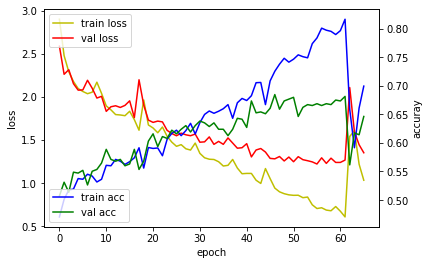

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## CNN + CNN + LSTM + LSTM

In [5]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64, input_shape = (600,6), return_sequences = True))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 14s 269ms/step - loss: 3.0403 - accuracy: 0.4309 - val_loss: 2.4838 - val_accuracy: 0.5200
Epoch 2/100
40/40 [==============================] - 9s 218ms/step - loss: 2.4233 - accuracy: 0.5157 - val_loss: 2.2275 - val_accuracy: 0.5376
Epoch 3/100
40/40 [==============================] - 9s 223ms/step - loss: 2.2628 - accuracy: 0.5238 - val_loss: 2.1500 - val_accuracy: 0.5552
Epoch 4/100
40/40 [==============================] - 10s 242ms/step - loss: 2.1499 - accuracy: 0.5287 - val_loss: 2.1741 - val_accuracy: 0.5568
Epoch 5/100
40/40 [==============================] - 11s 268ms/step - loss: 2.1036 - accuracy: 0.5202 - val_loss: 2.0479 - val_accuracy: 0.5520
Epoch 6/100
40/40 [==============================] - 10s 241ms/step - loss: 2.0117 - accuracy: 0.5343 - val_loss: 1.9105 - val_accuracy: 0.5760
Epoch 7/100
40/40 [==============================] - 10s 248ms/step - loss: 1.9462 - accuracy: 0.5366 - val_loss: 1.8459 - val_accuracy: 0

In [6]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN2_LSTM2.csv', index=False)

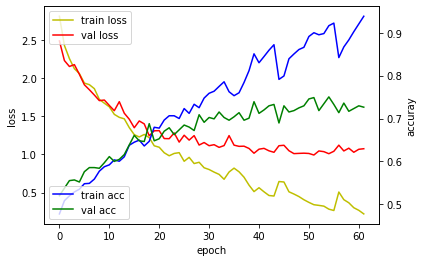

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(64, input_shape = (600,6), return_sequences = True)))
model.add(Bidirectional(LSTM(128, return_sequences = False)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 78s 785ms/step - loss: 2.9053 - accuracy: 0.4482 - val_loss: 2.2942 - val_accuracy: 0.5264
Epoch 2/100
40/40 [==============================] - 23s 576ms/step - loss: 2.2671 - accuracy: 0.5190 - val_loss: 1.9713 - val_accuracy: 0.5744
Epoch 3/100
40/40 [==============================] - 23s 581ms/step - loss: 2.0167 - accuracy: 0.5445 - val_loss: 1.8526 - val_accuracy: 0.5680
Epoch 4/100
40/40 [==============================] - 22s 540ms/step - loss: 1.8362 - accuracy: 0.5470 - val_loss: 1.8748 - val_accuracy: 0.5648
Epoch 5/100
40/40 [==============================] - 24s 605ms/step - loss: 1.7110 - accuracy: 0.5775 - val_loss: 1.9861 - val_accuracy: 0.5456
Epoch 6/100
40/40 [==============================] - 22s 550ms/step - loss: 1.8603 - accuracy: 0.5390 - val_loss: 1.5490 - val_accuracy: 0.6128
Epoch 7/100
40/40 [==============================] - 23s 567ms/step - loss: 1.4106 - accuracy: 0.6310 - val_loss: 1.4507 - val_accuracy:

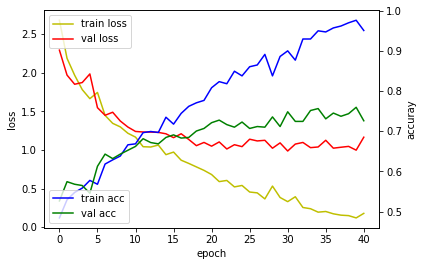

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN2_BiLSTM2.csv', index=False)

In [2]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional, GRU
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(128, 3, padding='same', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, padding='same', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(Bidirectional(LSTM(64, return_sequences = False)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=32,  validation_split=0.2, callbacks = [es])

Epoch 1/100
79/79 [==============================] - 26s 226ms/step - loss: 2.9934 - accuracy: 0.4613 - val_loss: 2.4697 - val_accuracy: 0.5232
Epoch 2/100
79/79 [==============================] - 18s 232ms/step - loss: 2.4597 - accuracy: 0.5063 - val_loss: 2.2476 - val_accuracy: 0.5280
Epoch 3/100
79/79 [==============================] - 22s 276ms/step - loss: 2.1844 - accuracy: 0.5270 - val_loss: 2.1870 - val_accuracy: 0.5440
Epoch 4/100
79/79 [==============================] - 22s 278ms/step - loss: 2.1041 - accuracy: 0.5294 - val_loss: 2.2548 - val_accuracy: 0.5328
Epoch 5/100
79/79 [==============================] - 22s 284ms/step - loss: 2.2365 - accuracy: 0.5102 - val_loss: 2.0496 - val_accuracy: 0.5408
Epoch 6/100
79/79 [==============================] - 22s 273ms/step - loss: 1.9370 - accuracy: 0.5378 - val_loss: 1.8946 - val_accuracy: 0.5552
Epoch 7/100
79/79 [==============================] - 22s 274ms/step - loss: 1.8404 - accuracy: 0.5476 - val_loss: 1.8390 - val_accuracy:

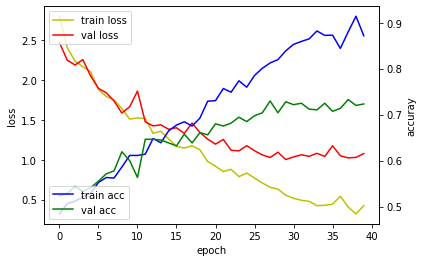

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [4]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('CNN2_BiLSTM2_v2.csv', index=False)